In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
import pycm 

FOLDER = 'out_OERHER_mofkey'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out_OERHER_mofkey: 108


In [7]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    print(res_full)
    summary = {
        'size': res_full['train_size'],
        #'test_size': len(res_full['predictions']),
        'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

{'results': {'accuracy': 0.0, 'acc_macro': 0.3333333333333333, 'racc': 0.0, 'kappa': 0.0, 'confusion_matrix': pycm.ConfusionMatrix(classes: [-9223372036854775808, 0, 1]), 'f1_macro': 0.0, 'f1_micro': 0.0, 'frac_valid': 1.0, 'all_y_true': [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'all_y_pred': array([-9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223

In [8]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['target','bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [9]:
grouped_res


accuracy            f1_macro  \
                                                  mean       sem      mean   
target   bins num_epochs representation size                                 
HER_bool 2    8          mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.000000  0.000000  0.000000   
                                        50    0.016260  0.008130  0.015873   
                                        75    0.437500  0.095470  0.384747   
              16         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.013333  0.013333  0.012698   
                                        50    0.756098  0.050772  0.705703   
                                        75    0.916667  0.020833  0.902662   
              25         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.786667  0.013333  0.751036   
                                        50    0.894309  0.021510  0.871931   
                                        75    0.916667  0.020833  0.902662   
OER_bool 2    8          mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.000000  0.000000  0.000000   
                                        50    0.000000  0.000000  0.000000   
                                        75    0.687500  0.000000  0.407407   
              16         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.000000  0.000000  0.000000   
                                        50    0.804878  0.014082  0.738725   
                                        75    0.854167  0.055120  0.795715   
              25         mofkey         10    0.006667  0.006667  0.006173   
                                        25    0.753333  0.017638  0.643050   
                                        50    0.837398  0.032520  0.797461   
                                        75    0.895833  0.020833  0.885346   
VIS_bool 2    8          mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.000000  0.000000  0.000000   
                                        50    0.000000  0.000000  0.000000   
                                        75    0.520833  0.090810  0.432646   
              16         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.000000  0.000000  0.000000   
                                        50    0.772358  0.056911  0.649657   
                                        75    0.895833  0.041667  0.892574   
              25         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.800000  0.041633  0.760864   
                                        50    0.869919  0.058627  0.823321   
                                        75    0.937500  0.036084  0.933963   

                                                        f1_micro            \
                                                   sem      mean       sem   
target   bins num_epochs representation size                                 
HER_bool 2    8          mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.000000  0.000000  0.000000   
                                        50    0.007937  0.016260  0.008130   
                                        75    0.126508  0.437500  0.095470   
              16         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.012698  0.013333  0.013333   
                                        50    0.075778  0.756098  0.050772   
                                        75    0.024170  0.916667  0.020833   
              25         mofkey         10    0.000000  0.000000  0.000000   
                                        25    0.031592  0.786667  0

/tmp/ipykernel_79843/1739880486.py:40: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


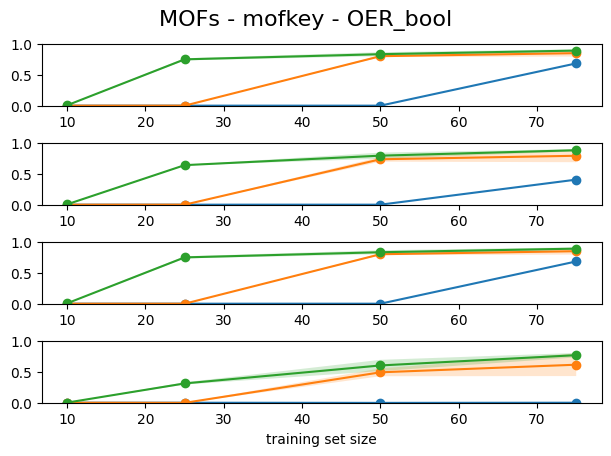

In [13]:
from scipy.stats import sem
from scipy.constants import golden
from datetime import datetime

ONE_COL_WIDTH_INCH = 6
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'mofkey'
TARGET = 'OER_bool'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), constrained_layout = True)
 
for num_epochs in [8, 16 , 25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[TARGET,BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
    
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')

#matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

now = datetime.now().strftime('%Y%m%d_%H%M')
fig.suptitle('MOFs - {} - {}'.format(REPRESENTATION, TARGET), fontsize=16)
fig.savefig(f'{now}_MOFs-{REPRESENTATION}-{TARGET}-{BINS}bin-classification-results.pdf', bbox_inches='tight')